In [10]:
import sys
sys.path.append('/Users/paolamartire/shocks')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
import healpy as hp
from Utilities.basic_units import radians
from src import orbits as orb
from Utilities import sections as sec
from Utilities.sections import make_slices
import Utilities.prelude as prel

from Utilities.operators import make_tree, to_spherical_components, to_cylindric
from Utilities.time_extractor import days_since_distruption
matplotlib.rcParams['figure.dpi'] = 300
abspath = '/Users/paolamartire/shocks'

In [11]:
# HEALPIX
observers_xyz = hp.pix2vec(prel.NSIDE, range(prel.NPIX))
observers_xyz = np.array(observers_xyz).T
x, y, z = observers_xyz[:, 0], observers_xyz[:, 1], observers_xyz[:, 2]
r = np.sqrt(x**2 + y**2 + z**2)   # Radius (should be 1 for unit vectors)
theta = np.arctan2(y, x)          # Azimuthal angle in radians
phi = np.arccos(z / r)            # Elevation angle in radians
longitude_moll = theta              
latitude_moll = np.pi / 2 - phi 
indecesorbital = np.concatenate(np.where(latitude_moll==0))
first_idx, last_idx = np.min(indecesorbital), np.max(indecesorbital)

In [12]:
m = 4
Mbh = 10**m
beta = 1
mstar = .5
Rstar = .47
n = 1.5 # 'n1.5'
gamma = 5/3
params = [Mbh, Rstar, mstar, beta]
check = 'NewAMR' # '' or 'HiRes' or 'LowRes'
snap = '90'
compton = 'Compton'

folder = f'R{Rstar}M{mstar}BH{Mbh}beta{beta}S60n{n}{compton}{check}' 
path = f'{abspath}/TDE/{folder}/{snap}'
saving_path = f'{abspath}/Figs/{folder}/{check}'

Rt = Rstar * (Mbh/mstar)**(1/3)
R0 = 0.6 * Rt
Rp =  Rt / beta
Rs = 2*prel.G*Mbh/prel.csol_cgs**2
apo = orb.apocentre(Rstar, mstar, Mbh, beta)
amin = orb.semimajor_axis(Rstar, mstar, Mbh, G=1)
delta_E = Mbh/Rt * (Mbh/Rstar)**(-1/3) # Normalisation (what on the x axis you call \Delta E). It's GM/Rt^2 * Rstar

# cfr tidal disruption and at smoothing lenght
xcfr, ycfr, cfr = orb.make_cfr(Rt)
xcfr0, ycfr0, cfr0 = orb.make_cfr(R0)
# cfr for grid
radii_grid = [R0, Rt, 0.5*amin, 0.1*apo, 0.3*apo, 0.5*apo, apo] #np.linspace(R0, apo,100)
styles = ['dotted', 'dashed', 'solid', 'solid', 'solid', 'solid', 'solid']
xcfr_grid, ycfr_grid, cfr_grid = [], [], []
for i,radius_grid in enumerate(radii_grid):
    xcr, ycr, cr = orb.make_cfr(radius_grid)
    xcfr_grid.append(xcr)
    ycfr_grid.append(ycr)
    cfr_grid.append(cr)

Load data

In [ ]:
data = make_tree(path, snap, energy = True)
cut = data.Den > 1e-19
X, Y, Z, mass, den, Vol, Mass, Press, Temp, vx, vy, vz, IE_den, Diss_den = \
    make_slices([data.X, data.Y, data.Z, data.Mass, data.Den, data.Vol, data.Mass, data.Press, data.Temp, data.VX, data.VY, data.VZ, data.IE, data.Diss], cut)
dim_cell = Vol**(1/3) 
Diss = Diss_den * Vol
IE_spec = IE_den / den
R_vec = np.transpose(np.array([X, Y, Z]))
Rsph = np.linalg.norm(R_vec, axis = 1)
vel_vec = np.transpose(np.array([vx, vy, vz]))
vel = np.linalg.norm(vel_vec, axis=1)
orb_en = orb.orbital_energy(Rsph, vel, mass, prel.G, prel.csol_cgs, Mbh, R0) 
orb_en_spec = orb_en/mass
bern = orb_en/mass + IE_spec + Press/den
long = np.arctan2(Y, X)          # Azimuthal angle in radians
lat = np.arccos(Z / Rsph)
v_rad, _, _ = to_spherical_components(vx, vy, vz, lat, long)
orb_en = orb.orbital_energy(Rsph, vel, Mass, prel.G, prel.csol_cgs, Mbh, R0)
spec_orb_en = orb_en / Mass
ecc2 = orb.eccentricity_squared(R_vec, vel_vec, spec_orb_en, Mbh, G=prel.G)
ecc = np.array(np.sqrt(ecc2))

# divV = np.load(f'{abspath}/TDE/{folder}/{snap}/divV_{snap}.npy')
# ie_den = data.IE
# ie_mass = ie_den/data.Den
# L = (4*np.pi*Rsph**2 * prel.csol_cgs * data.Rad) * prel.en_converter
# Edot_diss = np.abs(data.Diss) * data.Vol

tfb = np.loadtxt(f'{path}/tfb_{snap}.txt')
# dataph = np.loadtxt(f'/Users/paolamartire/shocks/data/{folder}/photo/{check}_photo{snap}.txt')
# xph, yph, zph, volph= dataph[0], dataph[1], dataph[2], dataph[3]

# Shock zone
# idx_zone = shockzone[0]
# idx_zone = np.array([int(i) for i in idx_zone])
# x_zone = X[idx_zone]
# y_zone = Y[idx_zone]
# z_zone = Z[idx_zone]
# Vx_zone = VX[idx_zone]
# Vy_zone = VY[idx_zone]
# Vz_zone = VZ[idx_zone]
# Diss_zone = Diss[idx_zone]
# dim_cell_zone = dim_cell[idx_zone]
# div_zone = div[idx_zone]

# Shock surface
# idx_surf = shocksurface[0]
# idx_surf = np.array([int(i) for i in idx_surf])
# x_surf = x_zone[idx_surf]

cells are: 10722482


/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_43669/2607949992.py:22: RuntimeWarning: invalid value encountered in sqrt
  ecc = np.array(np.sqrt(ecc2))


In [ ]:
mask_noinfall = Rsph > 3*Rt
R_noinfall, T_noinfall, Diss_noinfall = Rsph[mask_noinfall], Temp[mask_noinfall], Diss[mask_noinfall]
plt.figure(figsize=(8, 6), dpi=150)
img = plt.scatter(T_noinfall, np.abs(Diss_noinfall*prel.en_converter)/prel.tsol_cgs, s = 1, c = R_noinfall/apo, cmap='rainbow', norm=colors.LogNorm(vmin=3*Rt/apo, vmax=2), rasterized=True)
cbar = plt.colorbar(img, label=r'$R/R_{\rm a}$')
plt.xlabel(r'$T$ [K]')
plt.ylabel(r'$|$Diss rate$|$ [erg/s]')
plt.loglog()
plt.ylim(1e29, 1e36)
plt.title(f't = {np.round(tfb, 2)}' + r' $t_{\rm fb}$')


Text(0.5, 1.0, 't = 0.52 $t_{\\rm fb}$')

In [6]:
midplane = np.abs(Z) < dim_cell
X_midplane, Y_midplane, Z_midplane, dim_midplane, Mass_midplane, Den_midplane, Press_midplane, Temp_midplane, Diss_den_midplane, VX_mid, VY_mid, VZ_mid, Press_mid, orb_en_mid, v_rad_mid, ecc_mid = \
    sec.make_slices([X, Y, Z, dim_cell, mass, den, Press, Temp, Diss_den, vx, vy, vz, Press, orb_en, v_rad, ecc], midplane)
kappa_mid = Press_midplane / Den_midplane**gamma
vol_mid = dim_midplane**3
Diss_midplane = Diss_den_midplane * vol_mid
Den_midplane_cgs = Den_midplane * prel.den_converter
Rsph_mid = np.sqrt(X_midplane**2 + Y_midplane**2 + Z_midplane**2)
long_mid = np.arctan2(Y_midplane, X_midplane)          # Azimuthal angle in radians
lat_mid = np.arccos(Z_midplane/ Rsph_mid)            # Elevation angle in radians

# import matlab.engine
# opac_path = f'{abspath}/src/Opacity'
# T_cool = np.loadtxt(f'{opac_path}/T.txt')
# Rho_cool = np.loadtxt(f'{opac_path}/rho.txt')
# rossland = np.loadtxt(f'{opac_path}/ross.txt')
# if check in ['LowRes', '', 'HiRes']:
#     from src.Opacity.linextrapolator import first_rich_extrap
#     T_cool2, Rho_cool2, rossland2 = first_rich_extrap(T_cool, Rho_cool, rossland, what = 'scattering_limit', slope_length = 5, highT_slope=-3.5)
# if check in ['QuadraticOpacity', 'QuadraticOpacityNewAMR']:
#     from src.Opacity.linextrapolator import linear_rich
#     T_cool2, Rho_cool2, rossland2 = linear_rich(T_cool, Rho_cool, rossland, what = 'scattering_limit', highT_slope = 0)
# eng = matlab.engine.start_matlab()
# sigma_rossland = eng.interp2(T_cool2, Rho_cool2, rossland2.T, np.log(Temp_midplane), np.log(Den_midplane_cgs), 'linear', 0)
# sigma_rossland = np.array(sigma_rossland)[0]
# sigma_rossland_eval = np.exp(sigma_rossland) # [1/cm]
# sigma_rossland_eval[sigma_rossland == 0.0] = 1e-20
# tau_mid = sigma_rossland_eval * dim_midplane * prel.Rsol_cgs 

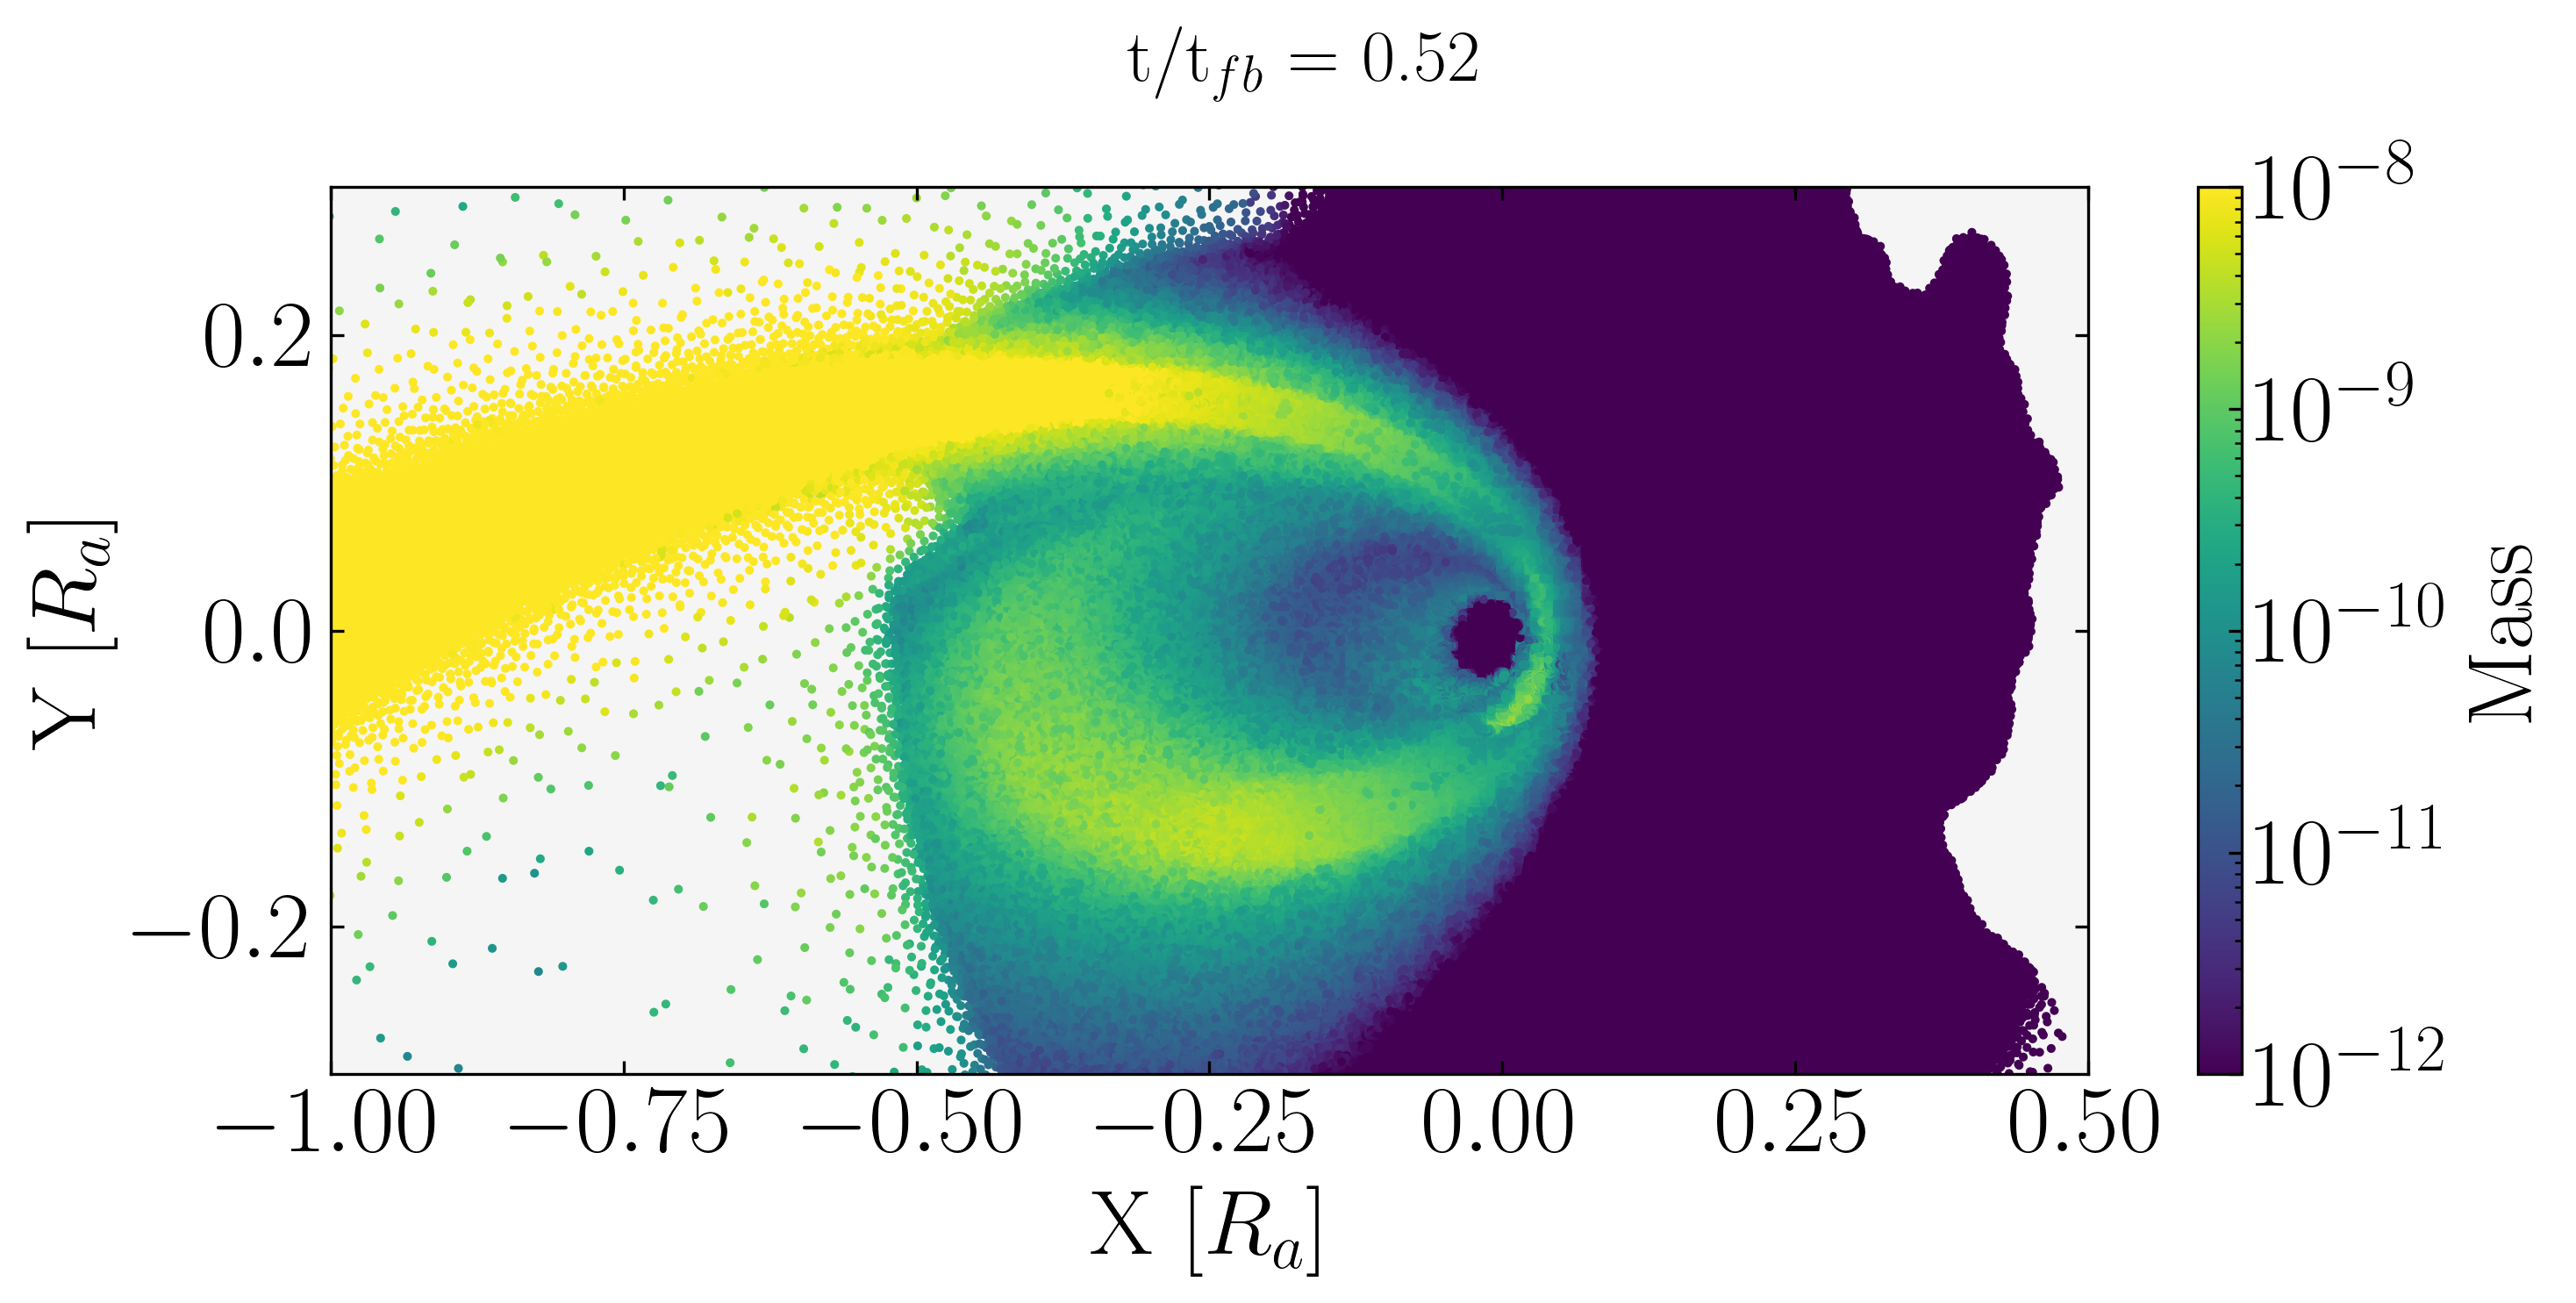

In [9]:
fig, ax1 = plt.subplots(1,1, figsize = (10,5))
img = ax1.scatter(X_midplane/apo, Y_midplane/apo, c = Mass_midplane, s = 2, cmap = 'viridis', norm = colors.LogNorm(vmin = 1e-12, vmax = 1e-8))
cbar = plt.colorbar(img)
cbar.set_label(r'Mass')
ax1.set_xlim(-1, .5)
ax1.set_ylim(-.3, .3)
ax1.set_xlabel(r'X [$R_a$]')
ax1.set_ylabel(r'Y [$R_a$]')
plt.suptitle(r't/t$_{fb}$ = ' + str(np.round(tfb,2)), fontsize = 20)
plt.tight_layout()

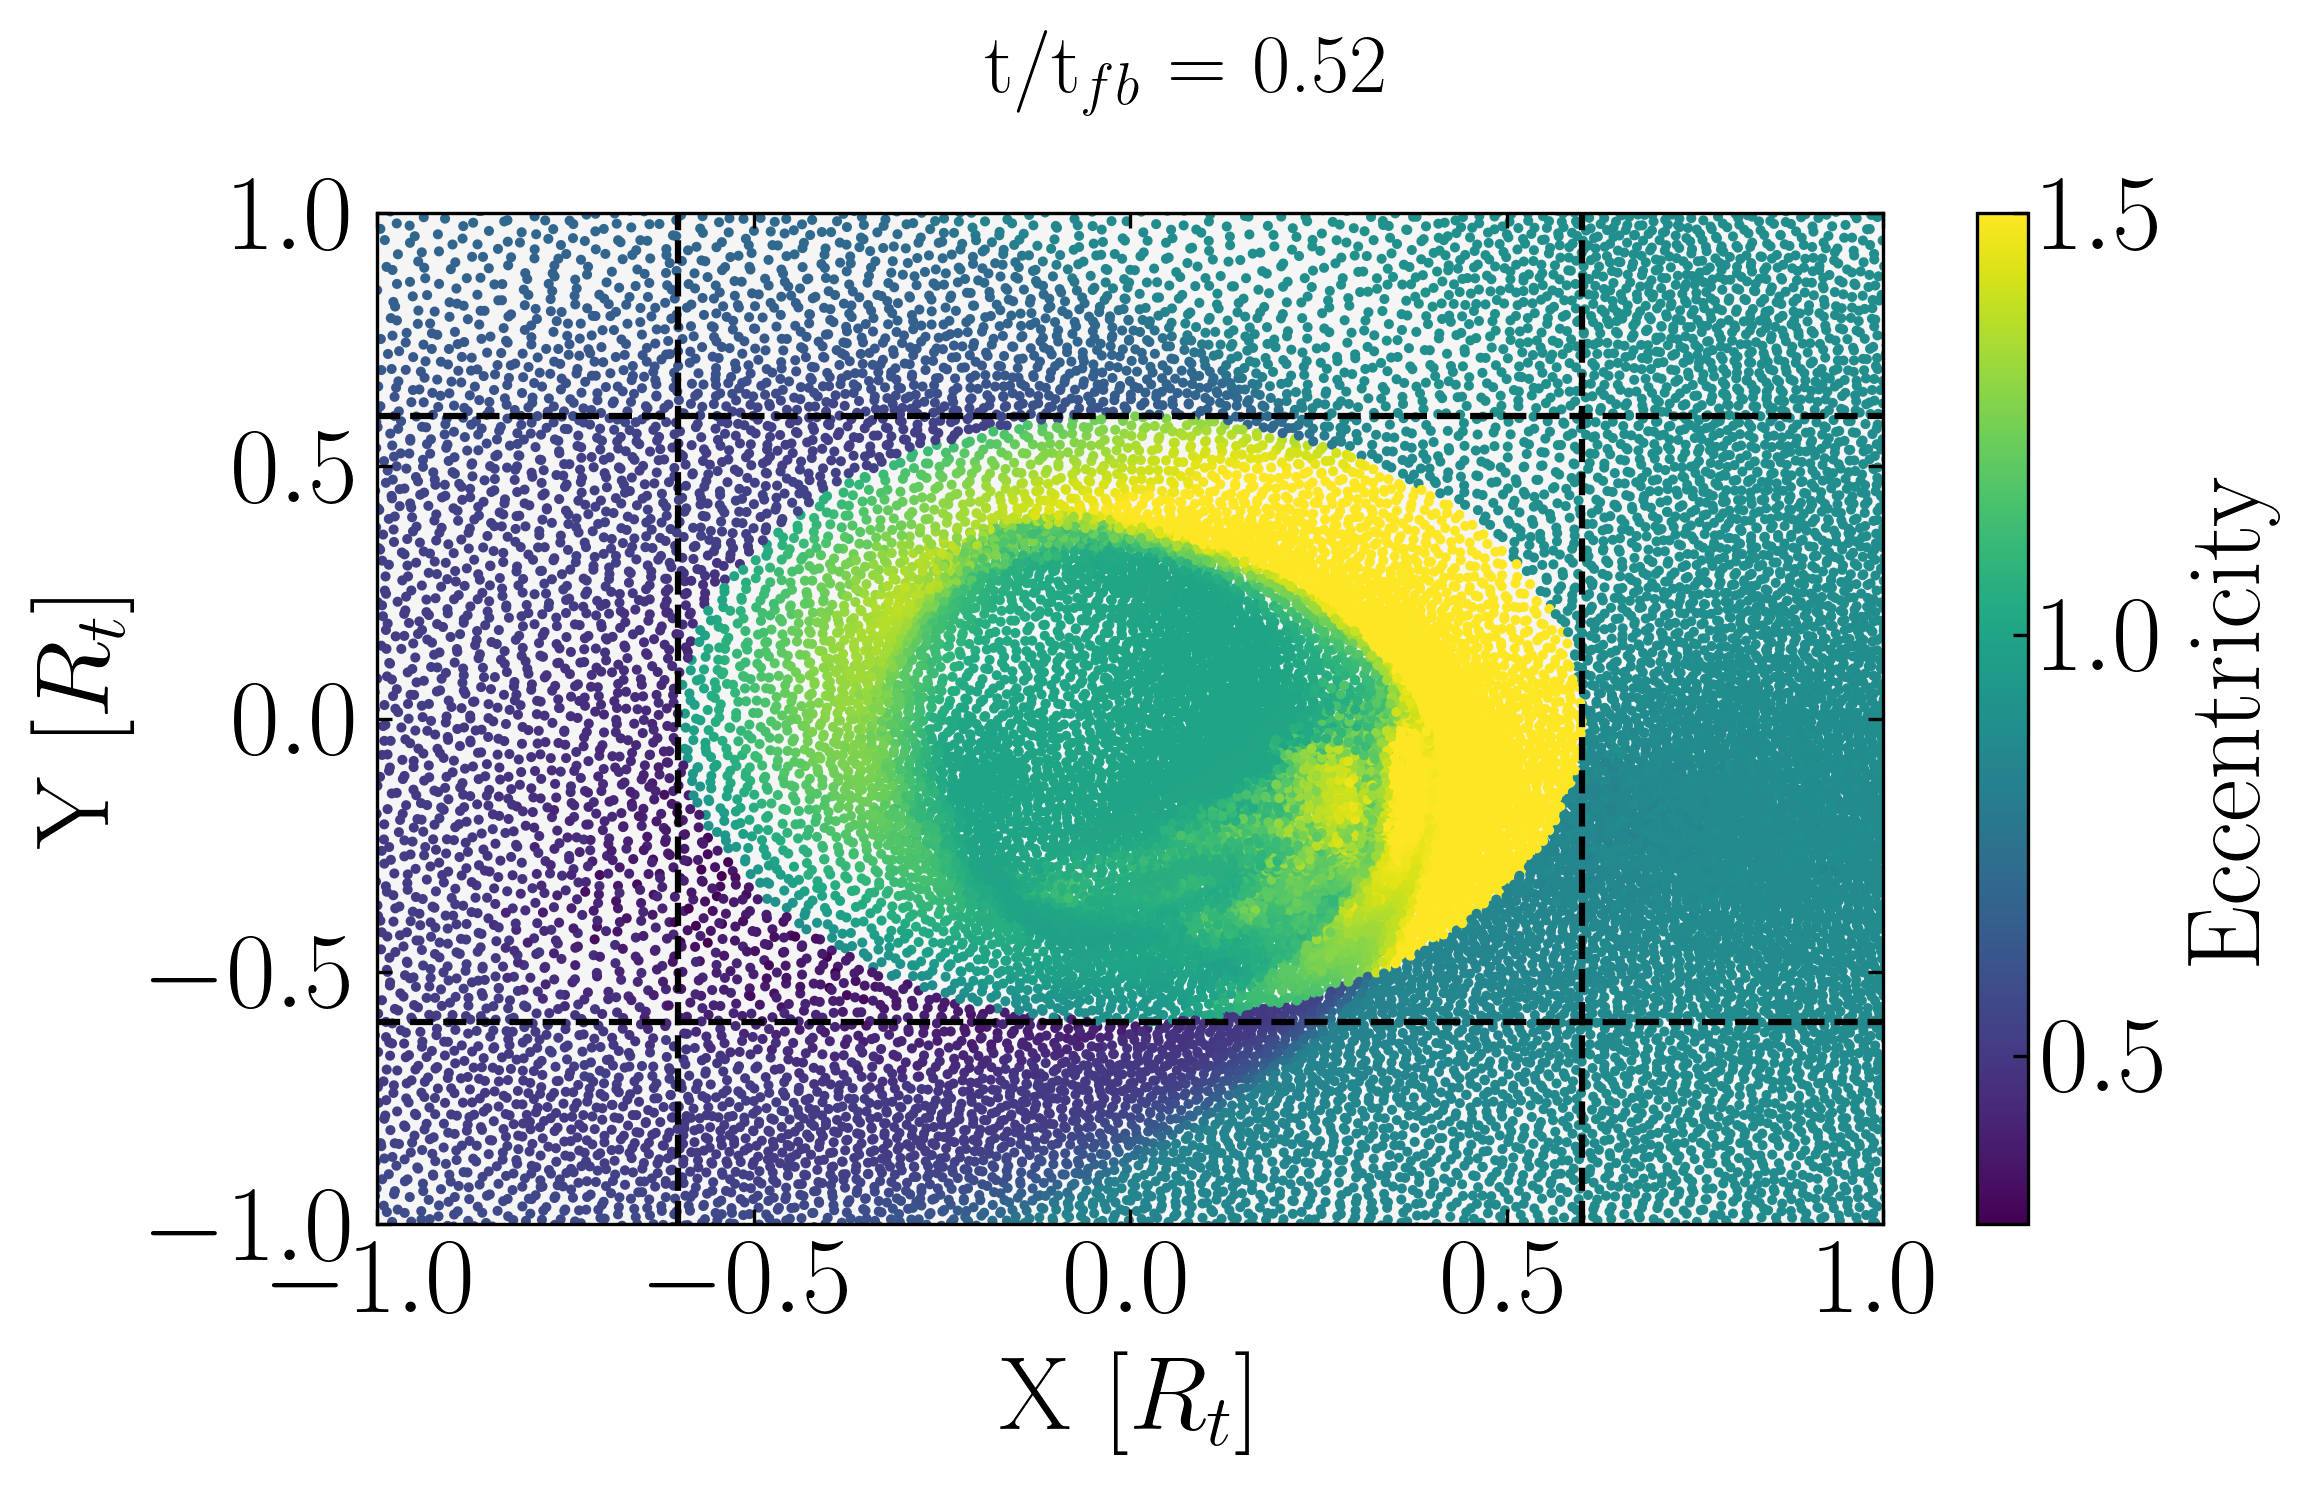

In [20]:
fig, ax1 = plt.subplots(1,1, figsize = (8,5))
img = ax1.scatter(X_midplane/Rt, Y_midplane/Rt, c = ecc_mid, s = 2, cmap = 'viridis', vmin = .3, vmax = 1.5)
cbar = plt.colorbar(img)
cbar.set_label(r'Eccentricity')
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_xlabel(r'X [$R_t$]')
ax1.set_ylabel(r'Y [$R_t$]')
ax1.axvline(-R0/Rt, color='k', linestyle='--')
ax1.axvline(R0/Rt, color='k', linestyle='--')
ax1.axhline(-R0/Rt, color='k', linestyle='--')
ax1.axhline(R0/Rt, color='k', linestyle='--')
plt.suptitle(r't/t$_{fb}$ = ' + str(np.round(tfb,2)), fontsize = 20)
plt.tight_layout()

In [ ]:
xchosen = 0
yz = np.abs(X-xchosen) < dim_cell
X_yz, Y_yz, Z_yz, dim_yz, Mass_yz, Den_yz, Press_yz, Temp_yz, Diss_den_yz, VX_yz, VY_yz, VZ_yz, orb_en_yz, v_rad_yz = \
    sec.make_slices([X, Y, Z, dim_cell, mass, den, Press, Temp, Diss_den, vx, vy, vz, orb_en, v_rad], yz)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,8))
img = ax1.scatter(Y_yz/amin, Z_yz/amin, c = Den_yz, s = 10, cmap = 'rainbow', norm = colors.LogNorm(vmin = 1e-12, vmax = 4e-8))
cbar = plt.colorbar(img)
cbar.set_label(r'Density $[M_\odot/R_\odot^3]$')
ax1.set_ylabel(r'Z [$a_{mb}$]')

ax2.scatter(Y_yz[np.logical_and(orb_en_yz>0, v_rad_yz<0)]/amin, Z_yz[np.logical_and(orb_en_yz>0, v_rad_yz<0)]/amin, s = 10, c = 'orange', label = 'in unbound')
ax2.scatter(Y_yz[np.logical_and(orb_en_yz<0, v_rad_yz<0)]/amin, Z_yz[np.logical_and(orb_en_yz<0, v_rad_yz<0)]/amin, s = 10, c = 'b', label = 'in bound')
ax2.scatter(Y_yz[np.logical_and(orb_en_yz<0, v_rad_yz>0)]/amin, Z_yz[np.logical_and(orb_en_yz<0, v_rad_yz>0)]/amin, s = 10, c = 'dodgerblue', label = 'out bound')
ax2.scatter(Y_yz[np.logical_and(orb_en_yz>=0, v_rad_yz>=0)]/amin, Z_yz[np.logical_and(orb_en_yz>=0, v_rad_yz>=0)]/amin, s = 10, c = 'r', label = 'out unbound')
# ax2.quiver(Y_yz[::1000]/amin, Z_yz[::1000]/amin, VY_yz[::1000]/140, VZ_yz[::1000]/140, angles='xy', scale_units='xy', scale=0.5, color="k", width=0.003, headwidth = 6)
img = ax3.scatter(Y_yz/amin, Z_yz/amin, c = np.abs(v_rad_yz), norm = colors.LogNorm(vmin = 1e-1, vmax = 4e1), s = 10, cmap = 'rainbow')
cbar = plt.colorbar(img)
cbar.set_label(r'$v_R$ [code units]')
for ax in [ax1, ax2, ax3]:
    ax.scatter(0,0,c= 'k', marker = 'x', s=80)
    ax.set_xlim(-10, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel(r'Y [$a_{mb}$]')
    ax.contour(xcfr_grid[2], ycfr_grid[2], cfr_grid[2], levels=[0], colors='k')
    ax.axvline(0.5, color = 'k', linestyle = 'dotted')
    ax.axhline(0.5, color = 'k', linestyle = 'dotted')
    ax.axvline(-0.5, color = 'k', linestyle = 'dotted')
    ax.axhline(-0.5, color = 'k', linestyle = 'dotted')
ax2.legend(fontsize = 20)   
plt.suptitle(r'Cross section, X=0, t/t$_{fb}$ = ' + str(np.round(tfb,3)), fontsize = 20)
plt.tight_layout()
# plt.savefig(f'{saving_path}/slices/yz{threshx}_{snap}.png')

In [ ]:
v_rad_05amin = v_rad[np.abs(Rsph-0.5*amin)<dim_cell]
rhov_05amin = den[np.abs(Rsph-0.5*amin)<dim_cell] * v_rad_05amin
plt.plot(np.abs(rhov_05amin[v_rad_05amin<0]), label = 'in')
plt.plot(rhov_05amin[v_rad_05amin>=0], label = 'out')
plt.legend()
plt.yscale('log')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,5))
img = ax1.scatter(X_midplane/apo, Y_midplane/apo, c = Den_midplane, s = 2, cmap = 'rainbow', norm = colors.LogNorm(vmin = 1e-11, vmax = 1e-6))
cbar = plt.colorbar(img)
cbar.set_label(r'Density $[M_\odot]$')
ax1.set_ylabel(r'Y [$R_a$]')

# img = ax2.scatter(X_midplane/amin, Y_midplane/amin, s = 2, c = Diss_den_midplane*prel.en_den_converter/prel.tsol_cgs, cmap = 'rainbow', norm = colors.LogNorm(vmin = 1e2, vmax = 1e8))
img = ax2.scatter(X_midplane/amin, Y_midplane/amin, s = 2, c = Temp_midplane, cmap = 'rainbow', norm = colors.LogNorm(vmin = 1e3, vmax = 1e6))
cbar = plt.colorbar(img)
cbar.set_label(r'T [K]')
# cbar.set_label(r'Diss density rate [erg/s/cm$^3$]')
# ax2.quiver(X_midplane[::1000]/amin, Y_midplane[::1000]/amin, VY_mid[::1000]/140, VZ_mid[::1000]/140, angles='xy', scale_units='xy', scale=0.5, color="k", width=0.003, headwidth = 6)
for ax in [ax1, ax2]:
    ax.set_xlim(-1.2, 1)
    ax.set_ylim(-.5, .5)
    ax.set_xlabel(r'X [$R_a$]')
    # ax.contour(xcfr_grid[2], ycfr_grid[2], cfr_grid[2], levels=[0], colors='k')
    # ax.axvline(0.5, color = 'k', linestyle = 'dotted')
    # ax.axhline(0.5, color = 'k', linestyle = 'dotted')
    # ax.axvline(-0.5, color = 'k', linestyle = 'dotted')
    # ax.axhline(-0.5, color = 'k', linestyle = 'dotted')
plt.suptitle(r'Cross section, Z=0, t/t$_{fb}$ = ' + str(np.round(tfb,3)), fontsize = 20)
plt.tight_layout()


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,8))
img = ax1.scatter(X_midplane/amin, Y_midplane/amin, c = Den_midplane, s = 10, cmap = 'rainbow', norm = colors.LogNorm(vmin = 1e-11, vmax = 1e-6))
cbar = plt.colorbar(img)
cbar.set_label(r'Density $[M_\odot]$')
ax1.set_ylabel(r'Y [$a_{mb}$]')

ax2.scatter(X_midplane[np.logical_and(orb_en_mid>0, v_rad_mid<0)]/amin, Y_midplane[np.logical_and(orb_en_mid>0, v_rad_mid<0)]/amin, s = 10, c = 'orange', label = 'in unbound')
ax2.scatter(X_midplane[np.logical_and(orb_en_mid<0, v_rad_mid<0)]/amin, Y_midplane[np.logical_and(orb_en_mid<0, v_rad_mid<0)]/amin, s = 10, c = 'b', label = 'in bound')
ax2.scatter(X_midplane[np.logical_and(orb_en_mid<0, v_rad_mid>0)]/amin, Y_midplane[np.logical_and(orb_en_mid<0, v_rad_mid>0)]/amin, s = 10, c = 'dodgerblue', label = 'out bound')
ax2.scatter(X_midplane[np.logical_and(orb_en_mid>=0, v_rad_mid>=0)]/amin, Y_midplane[np.logical_and(orb_en_mid>=0, v_rad_mid>=0)]/amin, s = 10, c = 'r', label = 'out unbound')

img = ax3.scatter(X_midplane/amin, Y_midplane/amin, c = np.abs(v_rad_mid), norm = colors.LogNorm(vmin = 1e-1, vmax = 3e1), s = 10, cmap = 'rainbow')
cbar = plt.colorbar(img)
cbar.set_label(r'$v_R$ [code units]')
# ax2.quiver(X_midplane[::1000]/amin, Y_midplane[::1000]/amin, VY_mid[::1000]/140, VZ_mid[::1000]/140, angles='xy', scale_units='xy', scale=0.5, color="k", width=0.003, headwidth = 6)
for ax in [ax1, ax2, ax3]:
    ax.set_xlim(-10, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel(r'X [$a_{mb}$]')
    ax.contour(xcfr_grid[2], ycfr_grid[2], cfr_grid[2], levels=[0], colors='k')
    ax.axvline(0.5, color = 'k', linestyle = 'dotted')
    ax.axhline(0.5, color = 'k', linestyle = 'dotted')
    ax.axvline(-0.5, color = 'k', linestyle = 'dotted')
    ax.axhline(-0.5, color = 'k', linestyle = 'dotted')
ax2.legend(fontsize = 20)   
plt.suptitle(r'Cross section, Z=0, t/t$_{fb}$ = ' + str(np.round(tfb,3)), fontsize = 20)
plt.tight_layout()


In [ ]:
# are we pressure dominated?
RadP_P = np.abs(prel.alpha_cgs/(3*prel.en_den_converter) * Temp**4 / Press)
RadP_P = np.abs(prel.alpha_cgs/(3*prel.en_den_converter) * Temp**4 / Press)
RadP_Pmid = np.abs(prel.alpha_cgs/(3*prel.en_den_converter) * Temp_midplane**4 / Press_midplane)
plt.scatter(X_midplane/apo, Y_midplane/apo, c = RadP_Pmid, s = 5, cmap = 'rainbow', norm = colors.LogNorm(vmin = 1e-2, vmax = 1e2))
plt.colorbar(label = r'$\frac{P_{\rm rad}}{P_{\rm gas}}$')
plt.xlabel(r'X [$R_{a}$]')
plt.ylabel(r'Y [$R_{a}$]')
plt.xlim(-7,3)
plt.ylim(-4,4)
plt.title(f'Total radiation dominated cells: {int(len(RadP_P[RadP_P>=1])/len(RadP_P)*100)}\% ' + r'at t/t$_{\rm fb}$ = ' + str(np.round(tfb,2)), fontsize = 18)
plt.savefig(f'{saving_path}pressure_dom{snap}.png')


In [ ]:
theta_prec = orb.precession_angle(Rstar, mstar, Mbh, beta, prel.csol_cgs, prel.G)
R_si = orb.R_selfinter(Rstar, mstar, Mbh, beta, prel.csol_cgs, prel.G)
print(f'Precession angle: {theta_prec} rad, {theta_prec*180/np.pi} degrees')
print(f'Self-intersection radius: {R_si} Rsol')


In [ ]:
import matlab.engine
from src.Opacity.linextrapolator import nouveau_rich
eng = matlab.engine.start_matlab()
opac_path = f'{abspath}/src/Opacity'
T_cool = np.loadtxt(f'{opac_path}/T.txt')
Rho_cool = np.loadtxt(f'{opac_path}/rho.txt')
rossland = np.loadtxt(f'{opac_path}/ross.txt')
T_cool2, Rho_cool2, rossland2 = nouveau_rich(T_cool, Rho_cool, rossland, what = 'scattering', slope_length = 5)
sigma_rossland = eng.interp2(T_cool2, Rho_cool2, rossland2.T, np.log(Temp_midplane), np.log(Den_midplane_cgs), 'linear', 0)
sigma_rossland = np.array(sigma_rossland)[0]
sigma_rossland_eval = np.exp(sigma_rossland) # [1/cm]
sigma_rossland_eval[sigma_rossland == 0.0] = 1e-20
tau_mid = sigma_rossland_eval * dim_midplane * prel.Rsol_cgs 
scatt_mid = 0.34*Den_midplane*prel.den_converter * dim_midplane * prel.Rsol_cgs

fig, ax1 = plt.subplots(1,1, figsize = (8,6))
img = ax1.scatter(X_midplane/apo, Y_midplane/apo, c = Mass_midplane, s = 1, cmap = 'turbo', norm = colors.LogNorm(vmin = 1e-12, vmax = 1e-9))
cbar = plt.colorbar(img)
cbar.set_label(r'Mass', fontsize = 16)
ax1.set_ylabel(r'Y [$R_a$]', fontsize = 18)
ax1.set_xlabel(r'X [$R_a$]', fontsize = 18)
plt.title(f'{folder} ' + r't/t$_{fb}$ = ' + str(np.round(tfb,3)), fontsize = 20)
plt.tight_layout()

fig, ax2 = plt.subplots(1,1, figsize = (8,6))
img = ax2.scatter(X_midplane/apo, Y_midplane/apo, c = tau_mid, s = 1, cmap = 'turbo', norm = colors.LogNorm(vmin = 9e-1, vmax = 1e4))
cbar = plt.colorbar(img)
cbar.set_label(r'$\tau$', fontsize = 16)
for ax in [ax1, ax2]:
    ax.axhline(2*Rt/apo, c = 'k')
    ax.axhline(-2*Rt/apo, c = 'k')
    ax.axvline(2*Rt/apo, c = 'k')
    ax.axvline(-2*Rt/apo, c = 'k')
    ax.set_xlim(-.2,.2)
    ax.set_ylim(-.2, .2)
    ax.set_xlabel(r'X [$R_a$]', fontsize = 18)
plt.title(f'{folder} ' + r't/t$_{fb}$ = ' + str(np.round(tfb,3)), fontsize = 20)
plt.tight_layout()
    

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize = (8,6))
img = ax1.scatter(X_midplane/apo, Y_midplane/apo, c = Diss_den_midplane, s = 1, cmap = 'turbo', norm = colors.LogNorm(vmin = 5e-10, vmax = 1e-7))
cbar = plt.colorbar(img)
cbar.set_label(r'$\rho$ [g/cm$^3$]', fontsize = 16)
ax1.set_ylabel(r'Y [$R_a$]', fontsize = 18)
ax1.set_xlabel(r'X [$R_a$]', fontsize = 18)
plt.title(f'{folder} ' + r't/t$_{fb}$ = ' + str(np.round(tfb,3)), fontsize = 20)
plt.tight_layout()

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize = (25,12))
img = ax1.scatter(X_midplane[np.logical_and(orb_en_spec_mid>0.5*delta_E, orb_en_spec_mid<0.6*delta_E)]/apo, Y_midplane[np.logical_and(orb_en_spec_mid>0.5*delta_E, orb_en_spec_mid<0.6*delta_E)]/apo, c = Den_midplane[np.logical_and(orb_en_spec_mid>0.5*delta_E, orb_en_spec_mid<0.6*delta_E)]*prel.den_converter, s = 2, cmap = 'turbo', norm = colors.LogNorm(vmin =1e-8, vmax = 1e-5))
cbar = plt.colorbar(img)
cbar.set_label(r'$\rho$ [g/cm$^3$]', fontsize = 16)
ax1.set_ylabel(r'Y [$R_a$]', fontsize = 18)

img = ax2.scatter(X_midplane[np.logical_and(orb_en_spec_mid>0.5*delta_E, orb_en_spec_mid<0.6*delta_E)]/apo, Y_midplane[np.logical_and(orb_en_spec_mid>0.5*delta_E, orb_en_spec_mid<0.6*delta_E)]/apo, c = Mass_midplane[np.logical_and(orb_en_spec_mid>0.5*delta_E, orb_en_spec_mid<0.6*delta_E)], s = 2, cmap = 'turbo', norm = colors.LogNorm(vmin = 2e-6, vmax = 5e-4))
cbar = plt.colorbar(img)
cbar.set_label(r'mass [M$_\odot$]', fontsize = 16)

img = ax3.scatter(X_midplane[np.logical_and(orb_en_spec_mid>0.5*delta_E, orb_en_spec_mid<0.6*delta_E)]/apo, Y_midplane[np.logical_and(orb_en_spec_mid>0.5*delta_E, orb_en_spec_mid<0.6*delta_E)]/apo, c = dim_midplane[np.logical_and(orb_en_spec_mid>0.5*delta_E, orb_en_spec_mid<0.6*delta_E)], s = 2, cmap = 'turbo', norm = colors.LogNorm(vmin = 1, vmax = 20))
cbar = plt.colorbar(img)
cbar.set_label(r'R [R$_\odot$]', fontsize = 16)

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(-6, -2)
    ax.set_ylim(-3, 0)
    ax.set_xlabel(r'X [$R_a$]', fontsize = 18)

img = ax4.scatter(X_midplane/apo, Y_midplane/apo, c = Den_midplane*prel.den_converter, s = 2, cmap = 'turbo', norm = colors.LogNorm(vmin =1e-8, vmax = 1e-5))
cbar = plt.colorbar(img)
cbar.set_label(r'$\rho$ [g/cm$^3$]', fontsize = 16)
ax1.set_ylabel(r'Y [$R_a$]', fontsize = 18)

img = ax5.scatter(X_midplane/apo, Y_midplane/apo, c = Mass_midplane, s = 2, cmap = 'turbo', norm = colors.LogNorm(vmin=2e-10, vmax = 1e-5))
cbar = plt.colorbar(img)
cbar.set_label(r'mass [M$_\odot$]', fontsize = 16)

img = ax6.scatter(X_midplane/apo, Y_midplane/apo, c = dim_midplane, s = 2, cmap = 'turbo', norm = colors.LogNorm(vmin = 4e-2, vmax = 2))
cbar = plt.colorbar(img)
cbar.set_label(r'R [R$_\odot$]', fontsize = 16)

for ax in [ax4, ax5, ax6]:
    ax.set_xlim(-.2, .2)
    ax.set_ylim(-.2, .2)
    ax.set_xlabel(r'X [$R_a$]', fontsize = 18)

plt.suptitle(f'tot cells in the box {int(len(data.X)*1e-6)}' + r'$\cdot10^6$' + f', {check}', fontsize = 20)
plt.tight_layout()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,6))
img = ax1.scatter(X_midplane/apo, Y_midplane/apo, c = Den_midplane*prel.den_converter, s = 1, cmap = 'turbo', norm = colors.LogNorm(vmin =1e-8, vmax = 1e-5))
cbar = plt.colorbar(img)
cbar.set_label(r'$\rho$ [g/cm$^3$]', fontsize = 16)
ax1.set_ylabel(r'Y [$R_a$]', fontsize = 18)

img = ax2.scatter(X_midplane/apo, Y_midplane/apo, c = kappa_mid, s = 1, cmap = 'turbo', norm = colors.LogNorm(vmin = 1e-2, vmax=1e5))
cbar = plt.colorbar(img)
cbar.set_label(r'$\kappa$', fontsize = 16)
# img = ax2.scatter(X_midplane[kappa_mid<20]/apo, Y_midplane[kappa_mid<20]/apo, c = 'b', s = 1)

for ax in [ax1, ax2]:
    # ax.scatter(observers_xyz[90:94,0], observers_xyz[90:94,1], c = 'k', s=20, label = 'observers')
    ax.scatter(0,0,c= 'k', marker = 'x', s=80)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel(r'X [$R_a$]', fontsize = 18)
plt.suptitle(r'Orbital plane, t/t$_{fb}$ = ' + str(np.round(tfb,3)), fontsize = 20)
plt.tight_layout()
plt.savefig(f'{saving_path}kappa_{snap}.png')


In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (18,6))
img = ax1.scatter(X_midplane/apo, Y_midplane/apo, c = Den_midplane*prel.den_converter, s = 1, cmap = 'turbo', norm = colors.LogNorm(vmin =1e-8, vmax = 1e-5))
cbar = plt.colorbar(img)
cbar.set_label(r'$\rho$ [g/cm$^3$]', fontsize = 16)
ax1.set_ylabel(r'Y [$R_a$]', fontsize = 18)

img = ax2.scatter(X_midplane/apo, Y_midplane/apo, c = kappa_mid, s = 1, cmap = 'turbo', norm = colors.LogNorm(vmin = 1e-2, vmax=1e5))
cbar = plt.colorbar(img)
cbar.set_label(r'$\kappa$', fontsize = 16)
img = ax2.scatter(X_midplane/apo, Y_midplane/apo, c = Temp_midplane, s = 1, cmap = 'turbo', norm = colors.LogNorm(vmin = 1e3, vmax=1e6))
cbar = plt.colorbar(img)

for ax in [ax1, ax2]:
    ax.scatter(observers_xyz[90:94,0], observers_xyz[90:94,1], c = 'k', s=20, label = 'observers')
    ax.scatter(0,0,c= 'k', marker = 'x', s=80)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel(r'X [$R_a$]', fontsize = 18)
ax2.legend()
plt.suptitle(r'Orbital plane, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
plt.tight_layout()
# plt.savefig(f'{saving_path}kappa_{snap}.png')

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize = (14,6))
img = ax1.scatter(X_midplane/apo, Y_midplane/apo, c = Den_midplane*prel.den_converter, s = 1, cmap = 'turbo', norm = colors.LogNorm(vmin =1e-12, vmax = 1e-5))
cbar = plt.colorbar(img)
cbar.set_label(r'Density [g/cm$^3$]', fontsize = 16)
ax1.set_ylabel(r'Y [$R_a$]', fontsize = 18)
ax1.set_xlim(-4,.5)
ax1.set_ylim(-.5, .5)
ax1.set_xlabel(r'X [$R_a$]', fontsize = 18)
plt.title(f'{folder} ' + r't/t$_{fb}$ = ' + str(np.round(tfb,3)), fontsize = 20)

In [ ]:
idxRp_lines_mid = np.concatenate(np.where(np.logical_and(np.abs(Y_midplane)<dim_midplane, np.abs(X_midplane-Rp)<dim_midplane))) #X=Rp, Y=0
PressRp_mid, DenRp_mid, XRp_mid, YRp_mid, dimRp_mid, TRp_mid = Press_midplane[idxRp_lines_mid], Den_midplane[idxRp_lines_mid], X_midplane[idxRp_lines_mid], Y_midplane[idxRp_lines_mid], dim_midplane[idxRp_lines_mid], Temp_midplane[idxRp_lines_mid]
idxRp_mid = np.argmin(np.abs(XRp_mid-Rp)) #Z=0, Y=0, X=Rp
print('Rp coordinates X, Y: ', XRp_mid[idxRp_mid], YRp_mid[idxRp_mid])
csRp_mid = np.sqrt(PressRp_mid[idxRp_mid]/DenRp_mid[idxRp_mid])
Hrp_mid = csRp_mid/omegaRp
print(f'Minimum R cell size: {np.min(dim_midplane)}')
print(f'T = {TRp_mid[idxRp_mid]/1e6} 1e6 K')
print(f'Cs at Rp: {csRp_mid*prel.Rsol_cgs*1e-7/prel.tsol_cgs} 1e-7 cm/s \nH at Rp: {Hrp_mid} Rsol')
print(f'max numbers of cell in H: {Hrp_mid/np.min(dim_midplane)}')

In [ ]:
absvel = True
fig, ax = plt.subplots(1,1, figsize = (12,6))
if absvel:
    img = ax.scatter(X_midplane/apo, Y_midplane/apo, c = np.abs(v_rad_mid_kms), s = 4, cmap = 'jet', norm = colors.LogNorm(vmin = 5e2, vmax = 2e4))
else:
    img = ax.scatter(X_midplane/apo, Y_midplane/apo, c = v_rad_mid_kms*1e-4, s = 4, cmap = 'jet', vmin = -1, vmax = 1)#, vmin = 5e2, vmax = 2e4)
cbar = plt.colorbar(img)
ax.scatter(xph[indecesorbital]/apo, yph[indecesorbital]/apo, facecolor = 'none', edgecolors = 'k')
ax.scatter(0,0,c= 'k', marker = 'x', s=80)
ax.set_xlim(-6, 2.5)
ax.set_ylim(-3, 2)
ax.set_xlabel(r'X [$R_a$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_a$]', fontsize = 18)
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
if absvel:
    cbar.set_label(r'$|$Radial velocity$|$ [km/s]', fontsize = 16)
    plt.tight_layout()
    plt.savefig(f'{saving_path}/slices/absvel{snap}.png')
else:
    cbar.set_label(r'Radial velocity [10$^4$ km/s]', fontsize = 16)
    plt.tight_layout()
    plt.savefig(f'{saving_path}/slices/vel{snap}.png')


In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,6))
img = ax1.scatter(X_midplane/apo, Y_midplane/apo, c = Diss_midplane, s = 1, cmap = 'inferno', vmin = -1e-15, vmax = 1e-15)
cbar = plt.colorbar(img)
cbar.set_label(r'Dissipation rate [energy/time]', fontsize = 16)
ax1.set_ylabel(r'Y [$R_a$]', fontsize = 18)

img = ax2.scatter(X_midplane/apo, Y_midplane/apo, c = divV_mid, s = 1, cmap = 'inferno', vmin = -1, vmax=1)#1e2, vmax = 1e9)
cbar = plt.colorbar(img)
cbar.set_label(r'$\nabla v$ [1/time]', fontsize = 16)
for ax in [ax1, ax2]:
    ax.scatter(0,0,c= 'k', marker = 'x', s=80)
    ax.set_xlim(-1.2, 0.3)
    ax.set_ylim(-0.5, 0.5)
    ax.set_xlabel(r'X [$R_a$]', fontsize = 18)
plt.suptitle(r'Orbital plane, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
plt.tight_layout()
plt.savefig(f'{saving_path}midplaneDiss_{snap}.png')

In [ ]:
# fig, ax = plt.subplots(1,1, figsize = (12,4))
# img = ax.scatter(X_midplane/apo, Y_midplane/apo, c = EdotDiss_midplane, s = 1, cmap = 'jet', norm = colors.LogNorm(vmin = 1e-15, vmax = 1e-6))
# cbar = plt.colorbar(img)
# cbar.set_label(r'$\dot{E}_{diss}$ ', fontsize = 16)
# ax.scatter(0,0,c= 'k', marker = 'x', s=80)
# ax.text(-3.5,1.5, r'E diss tot =' + str(np.round(np.sum(Edot_diss)*1e5,2)) + r'$x$1e-5', fontsize = 16)
# ax.text(-3.5,1, r'E diss mid =' + str(np.round(np.sum(EdotDiss_midplane)*1e5,2)) + r'$x$1e-5', fontsize = 16)
# ax.set_xlim(-4,0.5)
# ax.set_ylim(-2,2)
# ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
# ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
# plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)) + f', check = {check}', fontsize = 18)

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,4))
img = ax.scatter(X_midplane/apo, Y_midplane/apo, c = Rad_midplane, s = 1, cmap = 'jet', norm = colors.LogNorm(vmin= 1e-8, vmax = 5e-5))
cbar = plt.colorbar(img)
cbar.set_label(r'Energy density [erg/cm$^3$]', fontsize = 16)
ax.scatter(0,0,c= 'k', marker = 'x', s=80)
ax.set_xlim(-1,0.1)
ax.set_ylim(-0.5,0.5)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,4))
img = ax.scatter(X_midplane/apo, Y_midplane/apo, c = L_midplane, s = 1, cmap = 'jet', norm = colors.LogNorm(vmin= 1e40, vmax = 1e46))
cbar = plt.colorbar(img)
cbar.set_label(r'Luminosity [erg/s]', fontsize = 16)
ax.scatter(0,0,c= 'k', marker = 'x', s=80)
ax.set_xlim(-8,0.1)
ax.set_ylim(-2,2)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))

In [ ]:
# search for indeces to explore
theta_arr, x_stream, y_stream, z_stream, thresh_cm = np.load(f'/Users/paolamartire/shocks/data/{folder}/stream_{check}{snap}.npy')
selected_indeces = np.arange(30,230,20)
plt.plot(x_stream, y_stream, c = 'k')
plt.scatter(x_stream[80], y_stream[80], c = 'k')
plt.xlim(-apo,100)
plt.ylim(-100,100)

Tangent and transverse plane

In [ ]:
idx = 80
condition_tra, x_onplane, x0 = sec.transverse_plane(X, Y, Z, dim_cell, x_stream, y_stream, z_stream, idx, coord= True)
X_tra, Y_tra, Z_tra, Vz_tra, Den_tra, Mass_tra, dim_tra = \
    sec.make_slices([X, Y, Z, vz, den, mass, dim_cell], condition_tra)
X_tra_midplane = X_tra[np.abs(Z_tra) < dim_tra]
Y_tra_midplane = Y_tra[np.abs(Z_tra) < dim_tra]

Plot as BonnerotLu22

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))
ax1.scatter(x_onplane/Rstar, Den_tra, s=.1, c='k')
ax1.set_xlabel(r'T/R$_\star$')
ax1.set_ylabel(r'Density [M$_\odot$/R$_\odot^3$]')
ax1.set_xlim(-15,15)
ax1.grid()

ax2.scatter(Z_tra/Rstar, Vz_tra, s=.1, c='k')
ax2.set_xlabel(r'Z/R$_\star$')
ax2.set_ylabel(r'V$_z [R_\odot/\tilde{t}$]')
ax2.set_xlim(-6.5,6.5)
ax2.set_ylim(-0.5, 0.5)
ax2.grid()

plt.tight_layout()
plt.suptitle('Reproducing Fig.3 from BonnerotLu22')

In [ ]:
indeces_boundary, x_T_width, w_params, h_params, thresh = orb.find_single_boundaries(data.X, data.Y, data.Z, dim_cell, data.Mass, stream , idx, params)

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (14,4), gridspec_kw = {'width_ratios': [2, 1]})
# img = ax[0].scatter(X_midplane, Y_midplane, c = Den_midplane, s = .1, cmap = 'viridis', vmin = 0.1*np.max(Den_tra), vmax = np.max(Den_tra))
# cbar = plt.colorbar(img)
# cbar.set_label(r' Density', fontsize = 16)
# ax[0].scatter(X_tra_midplane, Y_tra_midplane, s = 1, c = 'k')
# ax[0].set_xlim(-300,20)
# ax[0].set_ylim(-60,60)

img1 = ax[1].scatter(x_onplane, Z_tra, c = Den_tra,  cmap = 'viridis', s = 2, vmin = 0.1*np.max(Den_tra), vmax = np.max(Den_tra))
cbar1 = plt.colorbar(img1)
cbar1.set_label(r'Density', fontsize = 16)
ax[1].scatter(0, z_stream[idx], marker = 'x', s = 10, c = 'k', alpha = 1)
# ax[1].axvline(x_T_width[0], c = 'r')
# ax[1].axvline(x_T_width[1], c = 'r') # T coordinates for width
# ax[1].axvline(-thresh, linestyle = 'dashed', c = 'k', alpha = 0.8)
# ax[1].axvline(thresh, linestyle = 'dashed', c = 'k', alpha = 0.8)
# ax[1].text(0.9*thresh, -1.8*thresh, 'cutoff',fontsize = 11, rotation = 90,  bbox=dict(facecolor='white', alpha=0.8))
ax[1].set_xlim(-15,15)#2*thresh, 2*thresh)
ax[1].set_ylim(-15,15)#2*thresh, 2*thresh)

# ax[1].axhline(data.Z[indeces_boundary[2]], c = 'r')
# ax[1].axhline(data.Z[indeces_boundary[3]], c = 'r')
# ax[1].axhline(-thresh, linestyle = 'dashed', c = 'k', alpha = 0.8)
# ax[1].axhline(thresh, linestyle = 'dashed', c = 'k', alpha = 0.8)
# ax[1].set_ylim(-2*thresh, 2*thresh)

ax[1].set_ylabel(r'Z [$R_\odot$]', fontsize = 18) 
# plt.suptitle(f'{check}, cells W: {int(w_params[1])}, cells H: {int(h_params[1])}, theta: {np.round(theta_arr[idx], 2)}', fontsize = 16)
plt.tight_layout()


In [ ]:
len(x_onplane)